# Introduction

Here I'm looking at the cover times of the random walker versus the urban explorer on the ring graph

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


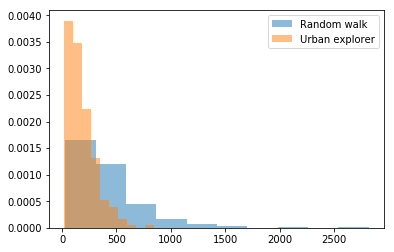

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.path_graph(num_nodes)

num_trials, m = 500, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw,normed=True,alpha=0.5);plt.hist(Ts_ue,normed=True,alpha=0.5);
plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_path_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_path_random_walker.txt',Ts_rw)

Good. Makes sense; the advective part of the urban explorer is useful on the ring. I wonder could I find
that curve analytically. Is it an exponential?

### Picture

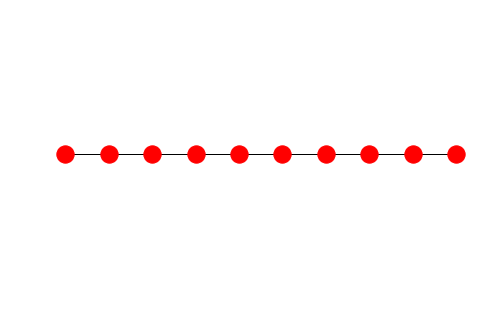

In [42]:
num_nodes = 10
G = nx.path_graph(num_nodes)
pos = [(x,0) for x in range(0,10)]
nx.draw(G,pos=pos)
plt.savefig('figures/pic.png')

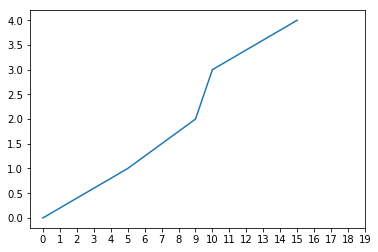

In [46]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x), 1.0))
plt.show()

## Be systematic

finished N = 5
finished N = 10
finished N = 15
finished N = 20
finished N = 25
finished N = 30
finished N = 35
finished N = 40
finished N = 45
finished N = 50
finished N = 55
finished N = 60
finished N = 65
finished N = 70
finished N = 75
finished N = 80
finished N = 85
finished N = 90
finished N = 95
finished N = 100


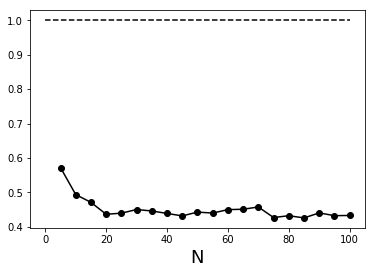

In [14]:
meanTratios = []
varTratios = []
Ns = range(5,101,5)
m = 1
for N in Ns:
    num_trials = 2000
    G = nx.path_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

np.savetxt('data/mean_covertime_ratio_path.txt',meanTratios)
np.savetxt('data/mean_covertime_ratio_path_Ns.txt',Ns)

In [16]:
mT_rw = []
mT_ur = []
Ns = [10,100,500,1000,2000,5000]
m = 1
for N in Ns:
    num_trials = 100
    G = nx.path_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

finished N = 10
finished N = 100
finished N = 500
finished N = 1000


KeyboardInterrupt: 

### Asymptotic

finished N = 10
finished N = 50
finished N = 100
finished N = 150
finished N = 200
finished N = 250
finished N = 300
finished N = 350
finished N = 400
finished N = 450
finished N = 500


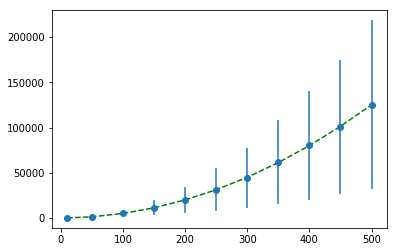

In [68]:
meanTs = []
varTs = []
Ns = [10] + range(50,501,50)
m = 1
for N in Ns:
    num_trials = 5000
    G = nx.path_graph(N)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTs.append(np.mean(Ts_ue))
    varTs.append(np.std(Ts_ue)) 
    print 'finished N = ' + str(N)
    
    
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,meanTs)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,meanTs,yerr=varTs,fmt='o')

np.savetxt('data/mean_cover_td_path.txt',meanTs)
np.savetxt('data/mean_cover_td_path_Ns.txt',Ns)
np.savetxt('data/mean_cover_td_path_std.txt',varTs)

I'm rerunning for 5000 trials, to be as sure as possible of the results

array([0.49330698, 2.0022949 ])

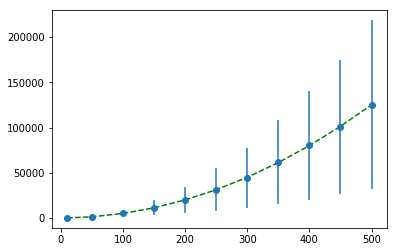

In [69]:
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,meanTs)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,meanTs,yerr=varTs,fmt='o')
popt

In [4]:
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_path_std.txt')

from scipy.optimize import curve_fit
def func(N,a,b,c):
    return a*N**3 + b*N**2 + c*N
popt, pcov = curve_fit(func,Ns,T_mean)
popt, pcov
#plt.plot(Ns, [func(N,popt[0]) for N in Ns], 'b--')
#plt.plot(Ns,T_mean,'bo')

(array([-1.07870907e-05,  5.08892824e-01, -1.66482600e+00]),
 array([[ 1.23590598e-09, -8.59430279e-07,  1.34313682e-04],
        [-8.59430279e-07,  6.14344239e-04, -9.99634613e-02],
        [ 1.34313682e-04, -9.99634613e-02,  1.73451325e+01]]))

### Test coefficient exactly

In [11]:
def find_delta(G,num_trials):
    
    meanTs = []
    nodes = [node for node in G.nodes()]
    Ts = []
    trial = 0
    m = 1
    N = G.number_of_nodes()
    
    paths = compute_and_save_all_shortest_paths(G)
    
    while trial < num_trials[-1]:
        trial += 1
        time = 0
        counts = np.zeros(len(nodes)) #count[i] count of node is        
        current_position = np.random.choice(nodes)
        counts[current_position] += 1
        num_unvisited_nodes = np.sum(counts < m)
        while num_unvisited_nodes > 0:
            nodes_minus_origin = nodes[:current_position] + nodes[current_position+1:]
            destination = np.random.choice(nodes_minus_origin)
            
            #Pick one of possibly many shortest paths
            all_shortest_paths = paths[current_position][destination]
            temp = np.random.choice(range(len(all_shortest_paths)))
            path = all_shortest_paths[temp]
            path = path[1:] #remove the origin
            
            #Traverse path
            for node in path:
                counts[node] += 1
                num_unvisited_nodes = np.sum(counts < m)
                time += 1
            current_position = destination
        Ts.append(time)
        if trial in num_trials:
            meanTs.append(np.mean(Ts))
    return [i - (1.0*(N**2)/2.0) for i in meanTs]


from funcs import *
N = 10
#num_trials = [10**2,10**3]
num_trials = [10**2, 10**3, 10**4, 10**5, 10**6]
G = nx.path_graph(N)
delta = find_delta(G,num_trials)
plt.plot(num_trials, delta)

KeyboardInterrupt: 

In [ ]:
from funcs import *
N = 20
#num_trials = [10**2,10**3]
num_trials = [10**2, 10**3, 10**4, 10**5, 10**6]
G = nx.path_graph(N)
delta = find_delta(G,num_trials)
plt.plot(num_trials, delta)

### Be systematic

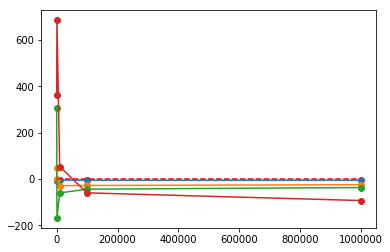

In [16]:
Ns = [10,50,100,200]
num_trials = [10**2, 10**3, 10**4, 10**5, 10**6]
for N in Ns:
    G = nx.path_graph(N)
    delta = find_delta(G,num_trials)
    plt.plot(num_trials, delta,'o-')
    np.savetxt('data/converge_delta_path_graph_N_' + str(N) + '.txt',delta)
    np.savetxt('data/converge_num_trials_path_graph_N_' + str(N) + '.txt',num_trials)
plt.plot(num_trials, [0 for i in num_trials], 'r--')

### Measure $<T>$ over decades

finished N = 10
took 0.000177884101868 mins 

finished N = 100
took 0.0710169315338 mins 

finished N = 200
took 0.511749684811 mins 



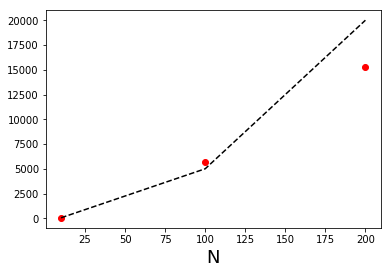

In [14]:
import time
T_mean = []
T_std = []
Ns = [10**1, 10**2, 10**3]
m = 1
for N in Ns:
    num_trials = 10
    G = nx.path_graph(N)
    t1 = time.time()
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    T_std.append(np.std(T))
    print 'finished N = ' + str(N)
    t2 = time.time()
    print 'took ' + str((t2-t1)/60.0) + ' mins \n'
plt.plot(Ns,T_mean,'ro')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,0.5*np.array(Ns)**2,'k--')
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} 

### Path graph

finished N = 10
finished N = 10
finished N = 10
finished N = 10
finished N = 10
finished N = 10
finished N = 10
finished N = 10
finished N = 10
finished N = 10


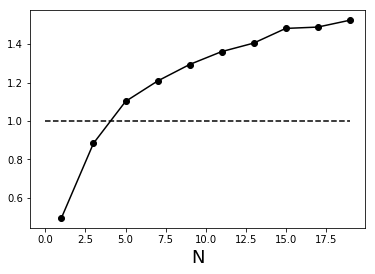

In [28]:
meanTratios = []
varTratios = []
N = 10
ms = range(1,21,2)
for m in ms:
    num_trials = 1000
    G = nx.path_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(ms,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(ms),linestyles='dashed')

np.savetxt('data/meanTratio_versus_mbar_PG.txt',meanTratios)
np.savetxt('data/maxTration_ns_PG.txt',ms)